In [1]:
# saves you having to use print as all exposed variables are printed in the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from ds_discovery import SyntheticBuilder, ModelsBuilder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
D = 4
N = 100

sb = SyntheticBuilder.from_memory()

In [5]:
df = pd.DataFrame()
df['target'] = sb.tools.get_number(10, 100, size=N)

In [6]:
df['latent_choice'] = sb.tools.get_dist_choice(number=.9, size=N)

In [7]:
selection = [sb.tools.select2dict(column='latent_choice', condition="@ == 1")]

action = sb.tools.action2dict(method='correlate_numbers', header='target', jitter=2)
default_action = sb.tools.action2dict(method="@header", header='target')

df['jitter1'] = sb.tools.correlate_selection(df, selection=selection, action=action, default_action=default_action)

In [8]:
df['latent_choice'] = sb.tools.get_dist_choice(number=.4, size=N)

In [9]:
selection = [sb.tools.select2dict(column='latent_choice', condition="@ == 1")]

action = sb.tools.action2dict(method='correlate_numbers', header='jitter1', jitter=20)
default_action = sb.tools.action2dict(method="@header", header='jitter1')

df['jitter2'] = sb.tools.correlate_selection(df, selection=selection, action=action, default_action=default_action)

In [10]:
df['latent_choice'] = sb.tools.get_dist_choice(number=.4, size=N)

In [11]:
selection = [sb.tools.select2dict(column='latent_choice', condition="@ == 1")]

action = sb.tools.action2dict(method='correlate_numbers', header='jitter2', jitter=50)
default_action = sb.tools.action2dict(method="@header", header='jitter2')

df['jitter3'] = sb.tools.correlate_selection(df, selection=selection, action=action, default_action=default_action)

In [12]:
df_show = df.copy().drop('latent_choice', axis=1)

<Figure size 1200x1200 with 0 Axes>

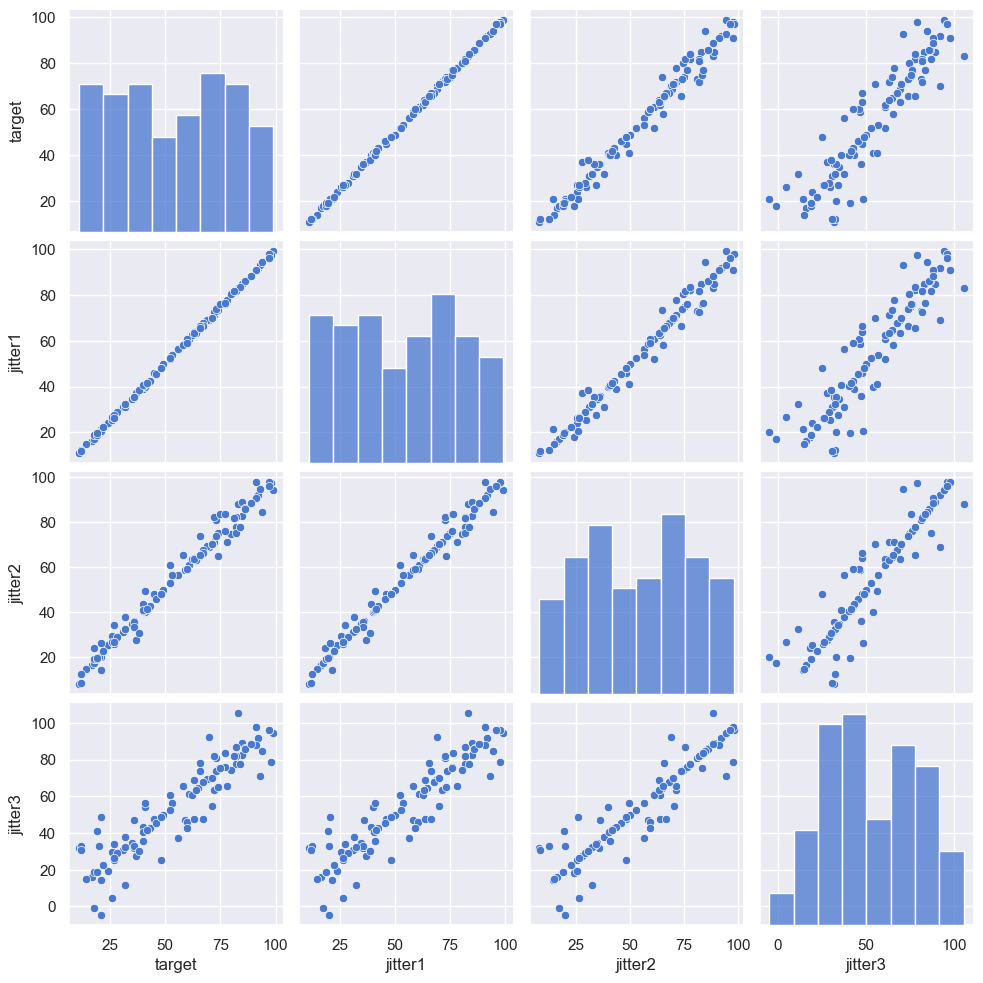

<Figure size 640x480 with 0 Axes>

In [13]:
sb.visual.show_corr_pairplot(df_show)

### Jaccard Similarity for Two Sets
The Jaccard similarity measures the similarity between two sets of data to see which members are shared and distinct. The Jaccard similarity is calculated by dividing the number of observations in both sets by the number of observations in either set. In other words, the Jaccard similarity can be computed as the size of the intersection divided by the size of the union of two sets.

$$ J(A,B) = \frac{|A \cap B |}{|A \cup B |} $$

In [44]:
def jaccard(x, y):
    return len(set(x).intersection(set(y))) / len(set(x).union(set(y)))

def jaccard_len(x, y):
    z=set(x).intersection(set(y))
    a=float(len(z))/(len(x)+len(y)-len(z))
    return a

def jaccard_set(list1, list2):
    """Define Jaccard Similarity function for two sets"""
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [45]:
jaccard(df['target'].to_list(),df['target'].to_list())

1.0

In [46]:
jaccard(df['target'].to_list(),df['jitter1'].to_list())

0.06535947712418301

In [41]:
jaccard(df['target'].to_list(),df['jitter2'].to_list())

0.025

In [42]:
jaccard(df['target'].to_list(),df['jitter3'].to_list())

0.012345679012345678

In [19]:
X = df.drop(['target'], axis=1).to_numpy()
y = df['target'].to_numpy().astype(np.int32)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [22]:
lin_reg.score(X_test, y_test)

0.9994071296487103

In [23]:
Yhat = lin_reg.predict(X_test)

$$ E = \sum_i \left( y_i - \hat y_i \right)^2 $$

In [24]:
d1 = y_test - Yhat
ssr = d1.dot(d1)

$$ \text{sum of squared total} = \sum_i \left( y_i - \bar y_i \right)^2 $$

In [25]:
d2 = y_test - y_test.mean()
sst = d2.dot(d2)

$$ R^2 = 1 - \frac{SSres}{SStot}  $$

In [26]:
# calculating r-squared
r2 = 1 - ssr/sst
print(f"The r-squared is: {r2}")

The r-squared is: 0.9994071296487103


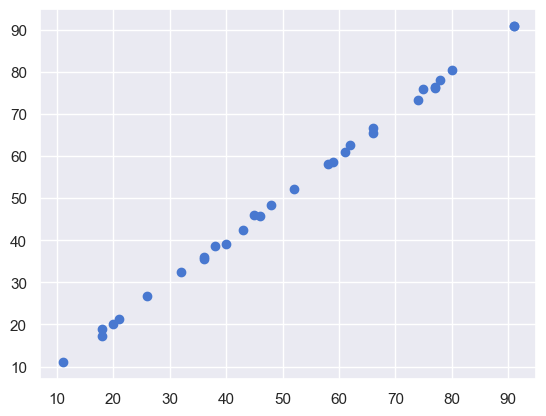

In [27]:
x_axis  = y_test
y_axis = Yhat
plt.scatter(x_axis, y_axis)
plt.show()
